In [1]:
import pandas as pd

前回加工したデータを読み込む。

In [2]:
train = pd.read_csv('./processed/train1.csv', index_col=0)
test = pd.read_csv('./processed/test1.csv', index_col=0)

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,Miss


In [4]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,male,34.5,0,0,7.8292,Q,1,1,Mr
1,893,3,female,47.0,1,0,7.0000,S,2,0,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,1,1,Mr


## 2.1.ダミー変数

　Sex、EmbarkedやTitleなどは文字や言葉で表されるデータであり、質的データという。これら質的データを0と1のダミー変数で表現することで、定量的な分析に取り入れる。<br>
　get_dummiesメソッドを用いることで、質的データをダミー変数に変換する。

In [5]:
datasets = [train, test]
dummies = []
columns = ['Sex', 'Embarked', 'Title']

for dataset in datasets:
    dummies.append(pd.get_dummies(dataset[columns]))

In [6]:
dummies[0].head(3)#train

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0


In [7]:
dummies[1].head(3)#test

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0


　作成したダミー変数のDataFrameをtrainとtestに追加する。

In [8]:
train = pd.concat([train, dummies[0]], axis=1)
test = pd.concat([test, dummies[1]], axis=1)

　質的データがダミー変数によって表現されていることを確認しよう。

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Embarked        891 non-null object
FamilySize      891 non-null int64
IsAlone         891 non-null int64
Title           891 non-null object
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Other     891 non-null uint8
dtypes: float64(2), int64(7), object(3), uint8(10)
memory usage: 99.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Sex             418 non-null object
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Fare            418 non-null float64
Embarked        418 non-null object
FamilySize      418 non-null int64
IsAlone         418 non-null int64
Title           418 non-null object
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
Embarked_C      418 non-null uint8
Embarked_Q      418 non-null uint8
Embarked_S      418 non-null uint8
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Other     418 non-null uint8
dtypes: float64(2), int64(6), object(3), uint8(10)
memory usage: 43.3+ KB


　これで全てのデータが量的データで表された。

## 2.2.データの視覚化

　それでは各属性とSurvivedの関係を視覚化してみよう。<br>
　データの視覚化にはmatplotlibとseabornというライブラリを用いる。

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
sns.set_palette('muted')

　FacetGridクラスは、pandasのDataFrameとmatplotlibを関連づけるAPIである。

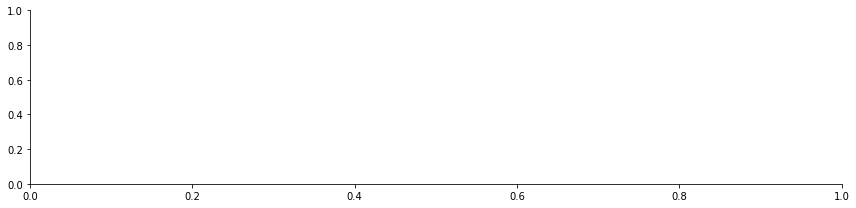

In [13]:
sns.FacetGrid(train, hue='Survived', aspect=4 )

　mapメソッドを用いて、プロット関数を適用しグラフを描画する。今回はsns.kdeplot(カーネル密度関数)を適用した。カーネル密度推定を行うことで、確率密度関数が描画できる。<br>
　setメソッドを用いて、グラフの見た目を調整する。今回は$x$軸の範囲を定めた。<br>
　add_legendメソッドを用いて、グラフに凡例を追加する。

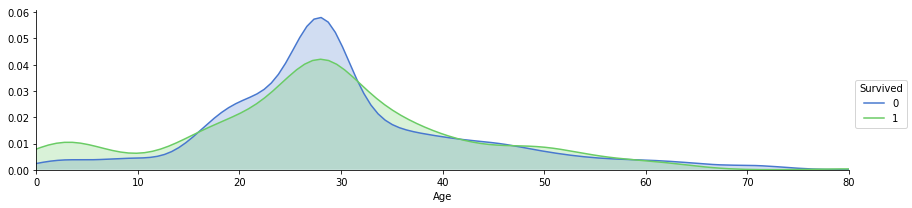

In [14]:
age_kde = sns.FacetGrid(train, hue='Survived', aspect=4 )
age_kde.map(sns.kdeplot, 'Age', shade=True )
age_kde.set(xlim=(0 , train['Age'].max()))
age_kde.add_legend()

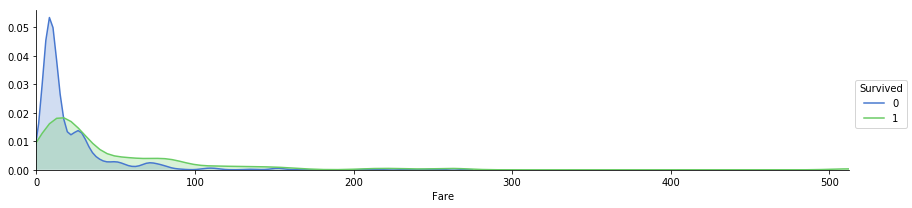

In [15]:
fare_kde = sns.FacetGrid(train, hue='Survived', aspect=4)
fare_kde.map(sns.kdeplot, 'Fare', shade=True )
fare_kde.set(xlim=(0 , train['Fare'].max()))
fare_kde.add_legend()

　subplots関数を用いることで、ひとつのfigure(図)に複数のaxis(座標軸)を描画することができる。<br>
　barplotメソッドを用いることで、エラーバー付き棒グラフを描画することができる。

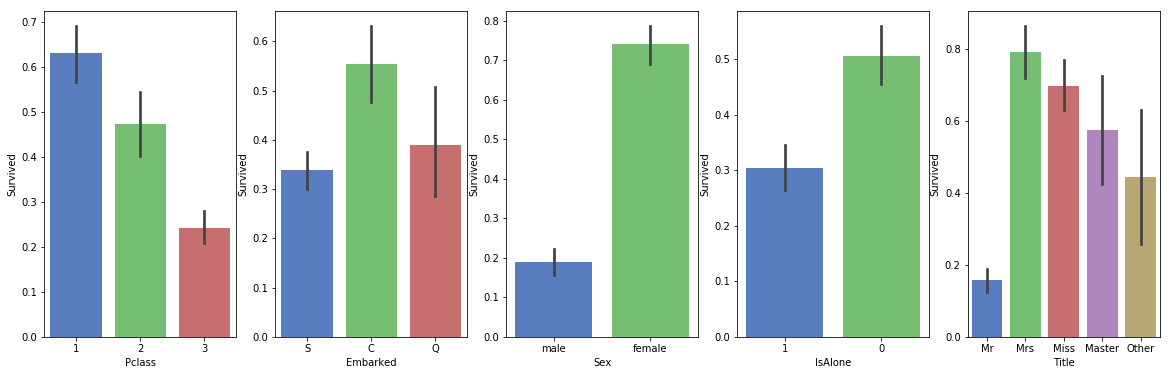

In [16]:
fig, axis = plt.subplots(1,5,figsize=(20, 6))

sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = axis[0])
sns.barplot(x = 'Sex', y = 'Survived', data=train, ax = axis[2])
sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = axis[1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train, ax = axis[3])
sns.barplot(x = 'Title', y = 'Survived', data=train, ax = axis[4])

　以上の視覚化から以下のようなことがわかる。
 
- Age

> - 10代前半までは**死亡率**よりも**生存率**の方が高い。


> - 10代後半から30代前半までは**生存率**よりも**死亡率**の方が高い。


> - 50代後半からは**生存率**よりも**死亡率**の方が高い。
 
- Fare

> - パレート分布に従う。


> - 低い価格帯で顕著に**生存率**が低い。
 
- Pclass

> グレードの高い客室ほど**生存率**が高い。

- Embarked

> Cがもっとも**生存率**が高い。

- Sex

> 女性の方が**生存率**が高い。

- IsAlone

> 家族がいた方が**生存率**が高い。

- Title

> - Master、Otherの標準誤差が他に比べて大きい。


> - Mrがもっとも**生存率**が低く、Mrs、Miss、Master、Otherの順で**生存率**が低くなる。

　客室のグレード、性別ごとの生存者および死亡者数のヒストグラムを見てみよう。

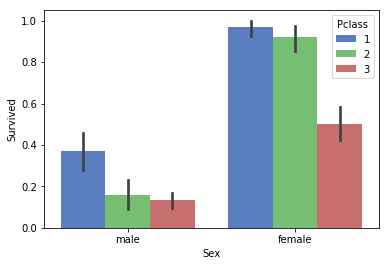

In [17]:
sns.barplot(x='Sex', y='Survived', data=train, hue='Pclass')

　さらに詳しく、年齢の分布を付け加えて描画する。

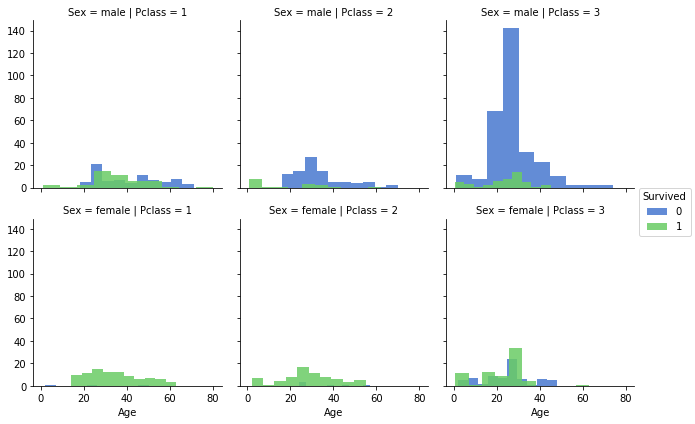

In [18]:
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .85)
h.add_legend()

　三等客室、男性とくに20代から30代の死亡者が顕著に多い。反対に、一等客室の女性はほとんど全員が生き残ったことがわかる。
 
 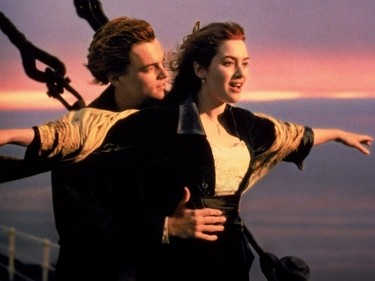

 最後に、加工したデータをCSVファイルで保存しておく。

In [19]:
train.to_csv('./processed/train2.csv')
test.to_csv('./processed/test2.csv')